<a href="https://colab.research.google.com/github/cdbm/F1DataAnalysis/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fórmula 1 (1950-2020)

O seguinte notebook trás uma análise dos dados do Campeonato mundial de Fórmula 1. Os dados incluem corridas, classificação, dados de voltas, pitstops, de corridas e dos circuitos.
 

Importação das bibliotecas e datasets




In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
circuits=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/circuits.csv")
constructor_results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_results.csv")
constructor_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructor_standings.csv")
constructors=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/constructors.csv")
driver_standings=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/driver_standings.csv")
drivers=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/drivers.csv")
lap_times=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/lap_times.csv")
pit_stops=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/pit_stops.csv")
qualifying=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/qualifying.csv")
races=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/races.csv")
results=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/results.csv")
seasons=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/seasons.csv")
status=pd.read_csv("https://raw.githubusercontent.com/cdbm/F1DataAnalysis/master/f1_data/status.csv")



# Normalização do sistema de pontuação
Ao longo dos anos o modo como se pontuava as corridas mudou, essa mudança entre temporadas pode atrapalhar análises futuras, então é necessário uma padronização no sistema de pontuação. A normalização foi divida entre os anos em que o sistema de pontuação se manteve o mesmo. O método de normalização usado foi o de min-max. 

In [71]:
constructor_standings["year"] = constructor_standings.raceId.map(races.set_index("raceId")["year"])

In [ ]:
from_58_to_59 = constructor_standings[(constructor_standings["year"] >= 1958) & (constructor_standings["year"] <= 1959)]
from_58_to_59["points_norm"] = (from_58_to_59['points'] - from_58_to_59['points'].min()) / (from_58_to_59['points'].max() - from_58_to_59['points'].min())

times_60 = constructor_standings[constructor_standings["year"] == 1960]
times_60["points_norm"] = (times_60['points'] - times_60['points'].min()) / (times_60['points'].max() - times_60['points'].min())

from_61_to_90 = constructor_standings[(constructor_standings["year"] >= 1961) & (constructor_standings["year"] <= 1990)]
from_61_to_90["points_norm"] = (from_61_to_90['points'] - from_61_to_90['points'].min()) / (from_61_to_90['points'].max() - from_61_to_90['points'].min())

from_91_to_02 = constructor_standings[(constructor_standings["year"] >= 1991) & (constructor_standings["year"] <= 2002)]
from_91_to_02["points_norm"] = (from_91_to_02['points'] - from_91_to_02['points'].min()) / (from_91_to_02['points'].max() - from_91_to_02['points'].min())

from_03_to_09 = constructor_standings[(constructor_standings["year"] >= 2003) & (constructor_standings["year"] <= 2009)]
from_03_to_09["points_norm"] = (from_03_to_09['points'] - from_03_to_09['points'].min()) / (from_03_to_09['points'].max() - from_03_to_09['points'].min())

from_10_to_18 = constructor_standings[(constructor_standings["year"] >= 2010) & (constructor_standings["year"] <= 2018)]
from_10_to_18["points_norm"] = (from_10_to_18['points'] - from_10_to_18['points'].min()) / (from_10_to_18['points'].max() - from_10_to_18['points'].min())

from_2019 = constructor_standings[constructor_standings["year"] >= 2019]
from_2019["points_norm"] = (from_2019['points'] - from_2019['points'].min()) / (from_2019['points'].max() - from_2019['points'].min())


points_norms = pd.concat([from_58_to_59, times_60, from_61_to_90, from_91_to_02, from_03_to_09, from_10_to_18, from_2019])
points_norms = points_norms.sort_values(by="constructorStandingsId")
constructor_standings["points_norm"] = points_norms["points_norm"]

Normalizando as pontuações para pilotos


In [73]:
driver_standings["year"] = driver_standings.raceId.map(races.set_index("raceId")["year"])

In [ ]:
drivers_from_50_to_59 = driver_standings[(driver_standings["year"] >= 1950) & (driver_standings["year"] <= 1959)]
drivers_from_50_to_59["points_norm"] = (drivers_from_50_to_59['points'] - drivers_from_50_to_59['points'].min()) / (drivers_from_50_to_59['points'].max() - drivers_from_50_to_59['points'].min())

drivers_times_60 = driver_standings[driver_standings["year"] == 1960]
drivers_times_60["points_norm"] = (drivers_times_60['points'] - drivers_times_60['points'].min()) / (drivers_times_60['points'].max() - drivers_times_60['points'].min())

drivers_from_61_to_90 = driver_standings[(driver_standings["year"] >= 1961) & (driver_standings["year"] <= 1990)]
drivers_from_61_to_90["points_norm"] = (drivers_from_61_to_90['points'] - drivers_from_61_to_90['points'].min()) / (drivers_from_61_to_90['points'].max() - drivers_from_61_to_90['points'].min())

drivers_from_91_to_02 = driver_standings[(driver_standings["year"] >= 1991) & (driver_standings["year"] <= 2002)]
drivers_from_91_to_02["points_norm"] = (drivers_from_91_to_02['points'] - drivers_from_91_to_02['points'].min()) / (drivers_from_91_to_02['points'].max() - drivers_from_91_to_02['points'].min())

drivers_from_03_to_09 = driver_standings[(driver_standings["year"] >= 2003) & (driver_standings["year"] <= 2009)]
drivers_from_03_to_09["points_norm"] = (drivers_from_03_to_09['points'] - drivers_from_03_to_09['points'].min()) / (drivers_from_03_to_09['points'].max() - drivers_from_03_to_09['points'].min())

drivers_from_10_to_18 = driver_standings[(driver_standings["year"] >= 2010) & (driver_standings["year"] <= 2018)]
drivers_from_10_to_18["points_norm"] = (drivers_from_10_to_18['points'] - drivers_from_10_to_18['points'].min()) / (drivers_from_10_to_18['points'].max() - drivers_from_10_to_18['points'].min())

drivers_from_2019 = driver_standings[driver_standings["year"] >= 2019]
drivers_from_2019["points_norm"] = (drivers_from_2019['points'] - drivers_from_2019['points'].min()) / (drivers_from_2019['points'].max() - drivers_from_2019['points'].min())


drivers_points_norms = pd.concat([drivers_from_50_to_59, drivers_times_60, drivers_from_61_to_90, drivers_from_91_to_02, drivers_from_03_to_09, drivers_from_10_to_18, drivers_from_2019])
drivers_points_norms = drivers_points_norms.sort_values(by="driverStandingsId")
driver_standings["points_norm"] = drivers_points_norms["points_norm"]

# Circuitos


Esse dataset mostra uma descrição breve de todos os circuitos que já sediaram alguma corrida de fórmula 1 


In [75]:
circuits['circuitRef'] = circuits['circuitRef'].astype('category')
circuits['name'] = circuits['name'].astype('category')
circuits['location'] = circuits['location'].astype('category')
circuits['country'] = circuits['country'].astype('category')
circuits['alt'] = circuits['alt'].astype('category')

Descrição dos dados:

circuitId: categórico nominal <br/>
circuitRef: categórico nominal<br/>
name: categórico nominal<br/>
location: categórico nominal<br/>
country: categórico nominal<br/>
lat: Contínuo<br/>
lng: Contínuo<br/>
alt: categórico nominal </br>
url: categórico nominal <br/>


In [ ]:
circuits.head()

In [ ]:
circuits.dtypes

In [ ]:
circuits['country'].cat.categories

Localização dos ciruitos no mapa


In [ ]:
circuits.plot.scatter(x='lng', y='lat')

Países com mais circuitos a sediar uma corrida de fórmula 1


In [ ]:
circuits.groupby(['country']).agg(['count'])["circuitId"].sort_values(by='count', ascending=False).plot.barh()

# Construtores


Esse dataset é reservado para mostrar informações das equipes que correm e correram na categoria.


In [81]:
constructors['constructorRef'] = constructors['constructorRef'].astype('category')
constructors['name'] = constructors['name'].astype('category')
constructors['nationality'] = constructors['nationality'].astype('category')

Descrição dos dados:

constructorId: categórico nominal <br/>
name: categórico nominal<br/>
nationality: categórico nominal<br/>



In [82]:
constructors.dtypes

constructorId        int64
constructorRef    category
name              category
nationality       category
url                 object
dtype: object

Países com mais equipes <br>
A diferença entre as equipes britânicas para o resto se da pelo fato da inglaterra ser o berço da fórmula 1 e além disso varias equipes escolhem a inglaterra como sede pela comodidade.

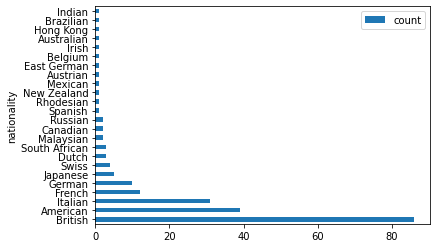

In [83]:
constructors.groupby(['nationality']).agg(['count'])['constructorRef'].sort_values(by='count', ascending=False).plot.barh()

# Resultados Construtores


Esse dataset mostra os resultados das equipes por corridas, mostrando a pontuação total em cada corrida disputada.

Descrição dos dados </br>
status: categórico binário


In [84]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [85]:
constructor_results.dtypes

constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object

In [86]:
constructor_results["status"] = constructor_results["status"].astype("category")

In [87]:
constructor_results["status"].cat.categories

Index(['D', '\N'], dtype='object')

# Classificação Construtores



o dataset de classificação dos contrutores mostra uma visão de como a equipe está situada no campeonato após dada corrida, mostrando os pontos conquistados até aqui, corridas vencidas entre outros.

Descrção dos dados </br>
positionText: categórico nomimal


In [88]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm
0,1,18,1,14.0,1,1,1,2008,0.053435
1,2,18,2,8.0,3,3,0,2008,0.030534
2,3,18,3,9.0,2,2,0,2008,0.034351
3,4,18,4,5.0,4,4,0,2008,0.019084
4,5,18,5,2.0,5,5,0,2008,0.007634


In [89]:
constructor_standings["positionText"] = constructor_standings["positionText"].astype("category")

In [90]:
constructor_standings["positionText"].cat.categories

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '3', '4', '5', '6', '7', '8', '9', 'E'],
      dtype='object')

In [91]:
constructor_standings.dtypes

constructorStandingsId       int64
raceId                       int64
constructorId                int64
points                     float64
position                     int64
positionText              category
wins                         int64
year                         int64
points_norm                float64
dtype: object

# Desempenho Construtores

Essa sessão é dedicada a uma análise de desempenho de várias equipes ao longo do tempo, suas pontuações, vitórias e comparações entre elas.

Análise de desempenho da ferrari durante os anos

In [137]:
ferrari_standings=constructor_standings[constructor_standings.constructorId == 6]
ferrari_standings.sort_values(by="raceId")
ferrari_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,points_norm,name
5,6,18,6,1.0,6,6,0,2008,0.003817,Ferrari
11,12,19,6,11.0,3,3,1,2008,0.041985,Ferrari
22,23,20,6,29.0,2,2,2,2008,0.110687,Ferrari
33,34,21,6,47.0,1,1,3,2008,0.179389,Ferrari
44,45,22,6,63.0,1,1,4,2008,0.240458,Ferrari


O gráfico a seguir mostra a pontuação final por temporada de uma das equipes mais tradicionais da categoria, a ferrari. Os pontos normalizados são usados pois utilizar apenas a pontuação comum resultaria num grande crescimento nos últimos anos favorecido apenas pelo regulamento e não necessariamente uma melhora na equipe.

In [ ]:
ferrari_standings["year"] = ferrari_standings.raceId.map(races.set_index("raceId")["year"])
ferrari_2019 = ferrari_standings[ferrari_standings.year == 2019]
ferrari_by_year = ferrari_standings.groupby(["year"]).agg("max")["points_norm"]
ferrari_by_year.plot()

Filtro na ferrari para comparar com red bull

In [ ]:
ferrari_from_2005 = ferrari_standings[ferrari_standings.year >= 2005]
ferrari_from_2005 = ferrari_from_2005.groupby(["year"]).agg("max")["points_norm"]
ferrari_from_2005.plot()

Análise de pountuação da Red Bull ao longo dos anos

In [ ]:
rbr_standings=constructor_standings[constructor_standings.constructorId == 9]
rbr_standings.sort_values(by="raceId")
rbr_standings.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


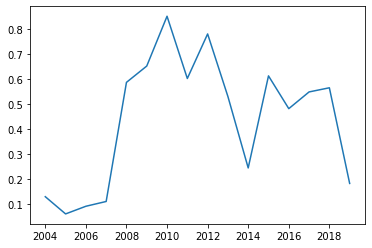

In [96]:
rbr_standings["year"] = rbr_standings.raceId.map(races.set_index("raceId")["year"])
rbr_year_2019 = rbr_standings[rbr_standings.year == 2019]
rbr_by_year = rbr_standings.groupby(["year"]).agg("max")["points_norm"]
plt.plot(np.arange(2004, 2020,1) ,rbr_by_year, label="Red Bull")

Análise de pontuação da mercedes ao longo dos anos

In [ ]:
mercedes_standings=constructor_standings[constructor_standings.constructorId == 131]
mercedes_standings.sort_values(by="raceId")
mercedes_standings.head()

In [ ]:
mercedes_standings["year"] = mercedes_standings.raceId.map(races.set_index("raceId")["year"])
mercedes_by_year = mercedes_standings.groupby(["year"]).agg("max")["points_norm"]
mercedes_by_year.plot()

Comparação de pontuação das 3 equipes mais influentes da categoria nos últimos anos


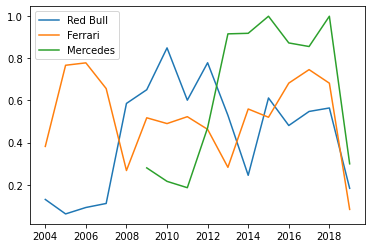

In [99]:
plt.plot(np.arange(2004, 2020,1) ,rbr_by_year, label="Red Bull")
plt.plot(np.arange(2004, 2020,1),ferrari_from_2005, label="Ferrari")
plt.plot(np.arange(2009, 2020, 1), mercedes_by_year, label="Mercedes")
plt.legend()
plt.show()

Análise de desempenho das equipes a partir do ano 2000


In [ ]:
constructor_standings["year"] = constructor_standings.raceId.map(races.set_index("raceId")["year"])
constructor_standings["name"] = constructor_standings.constructorId.map(constructors.set_index("constructorId")["name"])
constructor_standings_from_2000 = constructor_standings[constructor_standings["year"] >= 2000]
constructor_standings_from_2000.head()

In [101]:
names = constructor_standings_from_2000["name"].unique().tolist()

In [ ]:
for name in names:
  x = constructor_standings_from_2000.loc[constructor_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  plt.plot(x.index, x.points_norm, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

# Pilotos


Esse dataset mostra informações gerais dos pilotos, como nome, número, nacionalidade, data de nascimento entre outros.

In [103]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Descrição dos tipos <br>
nationality: categórico nominal


In [104]:
drivers["nationality"] = drivers["nationality"].astype("category")

In [105]:
drivers["nationality"].cat.categories

Index(['American', 'American-Italian', 'Argentine', 'Argentine-Italian',
       'Australian', 'Austrian', 'Belgian', 'Brazilian', 'British', 'Canadian',
       'Chilean', 'Colombian', 'Czech', 'Danish', 'Dutch', 'East German',
       'Finnish', 'French', 'German', 'Hungarian', 'Indian', 'Indonesian',
       'Irish', 'Italian', 'Japanese', 'Liechtensteiner', 'Malaysian',
       'Mexican', 'Monegasque', 'New Zealander', 'Polish', 'Portuguese',
       'Rhodesian', 'Russian', 'South African', 'Spanish', 'Swedish', 'Swiss',
       'Thai', 'Uruguayan', 'Venezuelan'],
      dtype='object')

In [106]:
drivers.dtypes

driverId          int64
driverRef        object
number           object
code             object
forename         object
surname          object
dob              object
nationality    category
url              object
dtype: object

Quantidade de pilotos por nacionalidade

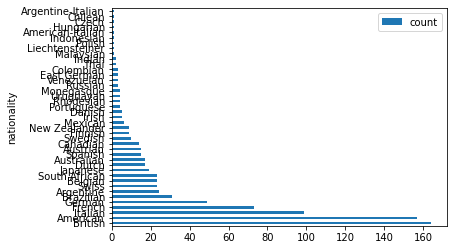

In [107]:
drivers.groupby(['nationality']).agg(['count'])['driverRef'].sort_values(by='count', ascending=False).plot.barh()

# Classificação Pilotos



O dataset de classificação dos pilotos é semelhante ao de construtores, mostra o seu desempenho até dada corrida, pontos obitidos até essa corrida, vitória e entre outros.

Descrção dos dados </br>
positionText: categórico nomimal

In [108]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year,points_norm
0,1,18,1,10.0,1,1,1,2008,0.067568
1,2,18,2,8.0,2,2,0,2008,0.054054
2,3,18,3,6.0,3,3,0,2008,0.040541
3,4,18,4,5.0,4,4,0,2008,0.033784
4,5,18,5,4.0,5,5,0,2008,0.027027


In [109]:
driver_standings["positionText"] = driver_standings["positionText"].astype("category") 

In [110]:
driver_standings["positionText"].cat.categories

Index(['1', '10', '100', '101', '102', '103', '104', '105', '106', '107',
       ...
       '91', '92', '93', '94', '95', '96', '97', '98', '99', 'D'],
      dtype='object', length=109)

In [111]:
driver_standings.dtypes

driverStandingsId       int64
raceId                  int64
driverId                int64
points                float64
position                int64
positionText         category
wins                    int64
year                    int64
points_norm           float64
dtype: object

Gráfico de desempenho dos pilotos com pelo menos uma vitória a partir do ano 2000

In [ ]:
driver_standings["year"] = driver_standings.raceId.map(races.set_index("raceId")["year"])
driver_standings["name"] = driver_standings.driverId.map(drivers.set_index("driverId")["driverRef"])
driver_standings_from_2000 = driver_standings[driver_standings["year"] >= 2000]
driver_standings_from_2000.head()

In [113]:
names = driver_standings_from_2000["name"].unique().tolist()

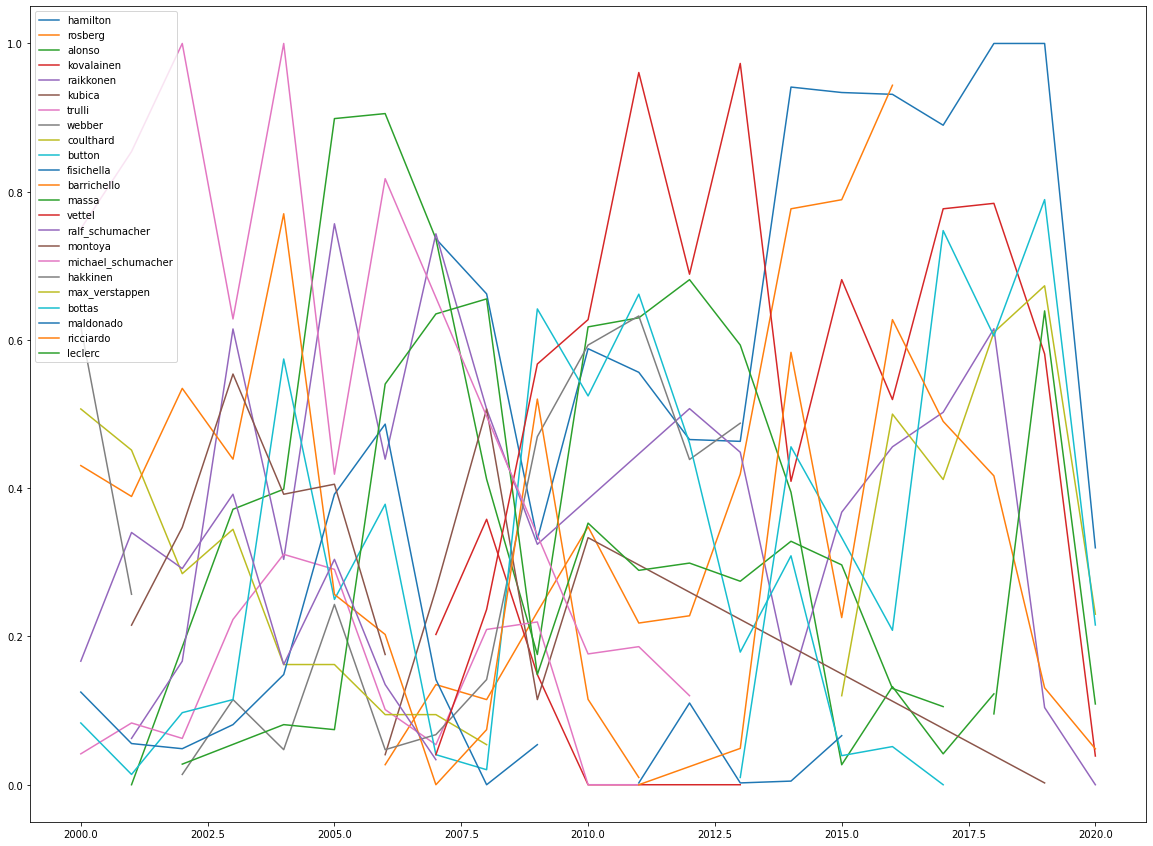

In [114]:
for name in names:
  x = driver_standings_from_2000.loc[driver_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  if x.wins.max() > 0: 
    plt.plot(x.index, x.points_norm, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

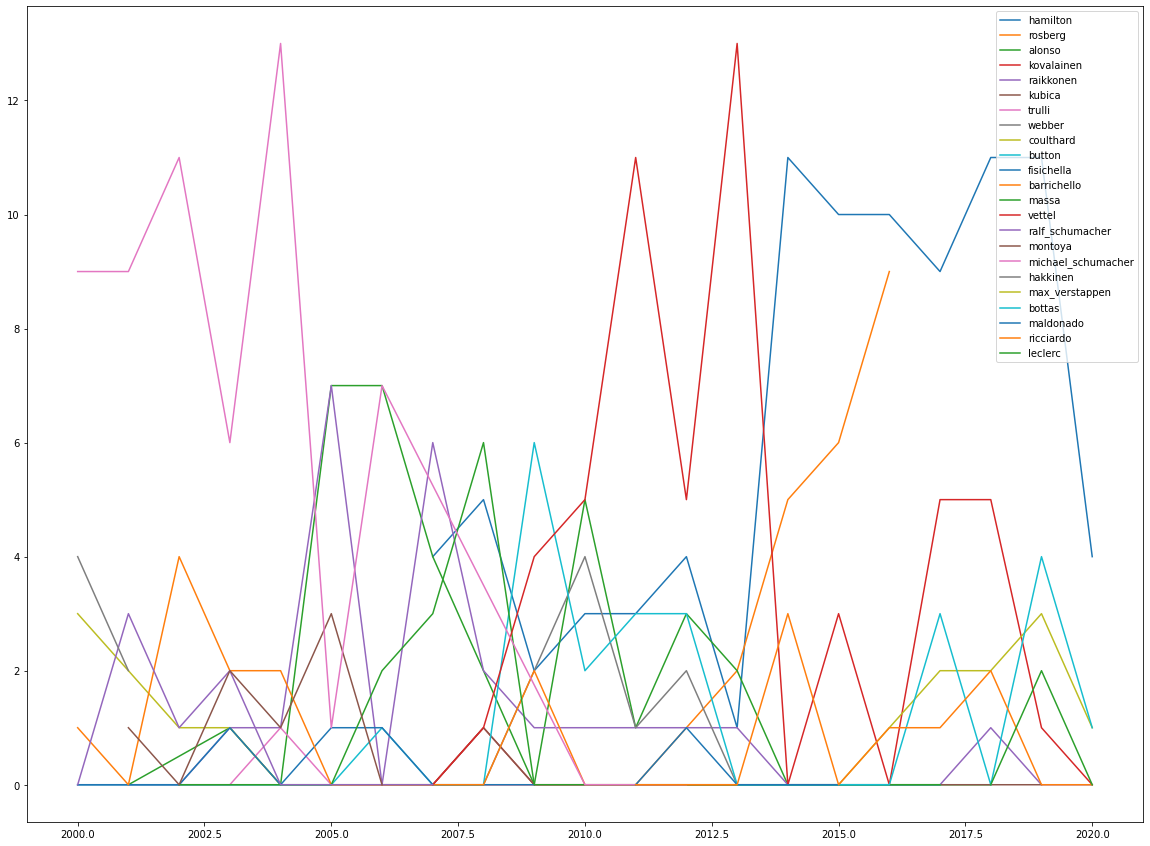

In [115]:
for name in names:
  x = driver_standings_from_2000.loc[driver_standings_from_2000["name"] == name]
  x = x.groupby(["year"]).agg("max")
  if x.wins.max() > 0: 
    plt.plot(x.index, x.wins, label=name)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.legend()
plt.show()

In [116]:
driver_standings.set_index("points", inplace=True, drop=False)

A seguir é feita uma análise para ver a correlação do número de pontos dos campeões de cada ano e sua taxa de vitórias, para entender o quão importante é ganhar corridas para ser campeão mundial.


In [117]:
years = driver_standings["year"].unique()
years

array([2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 2017, 1991, 1990, 2009, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2018, 2019, 2020])

In [118]:
champions_by_year = [driver_standings[driver_standings["year"] == year].groupby("driverId").agg("max").sort_values(by="points", ascending=False).iloc[0] for year in years] 
champions_by_year = pd.DataFrame(champions_by_year)
champions_by_year.sort_values(by="year")

,driverStandingsId,raceId,points,position,wins,year,points_norm,name
642,43539,839,30.0,3,3,1950,0.714286,farina
579,44049,832,31.0,2,3,1951,0.738095,fangio
647,44669,824,36.0,52,6,1952,0.857143,ascari
647,45286,816,34.5,1,5,1953,0.821429,ascari
579,52049,807,42.0,1,6,1954,1.000000,fangio
...,...,...,...,...,...,...,...,...
3,68132,968,385.0,2,9,2016,0.943627,rosberg
1,68585,988,363.0,2,9,2017,0.889706,hamilton
1,69110,1009,408.0,2,11,2018,1.000000,hamilton
1,69750,1030,413.0,2,11,2019,1.000000,hamilton


In [119]:
champions_by_year["win_percentage"] = champions_by_year["wins"] / champions_by_year.year.map(races.groupby("year").agg("count")["raceId"])
champions_by_year

,driverStandingsId,raceId,points,position,wins,year,points_norm,name,win_percentage
1,3438,35,98.0,4,5,2008,0.662162,hamilton,0.277778
8,13972,52,110.0,4,6,2007,0.743243,raikkonen,0.352941
4,13202,70,134.0,2,7,2006,0.905405,alonso,0.388889
4,64320,89,133.0,3,7,2005,0.898649,alonso,0.368421
30,12782,107,148.0,1,13,2004,1.000000,michael_schumacher,0.722222
...,...,...,...,...,...,...,...,...,...
1,67527,945,381.0,1,10,2015,0.933824,hamilton,0.526316
3,68132,968,385.0,2,9,2016,0.943627,rosberg,0.428571
1,69110,1009,408.0,2,11,2018,1.000000,hamilton,0.523810
1,69750,1030,413.0,2,11,2019,1.000000,hamilton,0.523810


In [120]:
correlations = champions_by_year.corr(method="spearman")

A correlação entre a porcentagem de vitórias e os pontos normalizados se mostrou relativamente relevante, alcançando 0.4277 num range entre -1 e 1, mostrando que sim é importante ter um bom número de vitórias durante uma temporada, apesar de não ser o único fator decisivo.

In [145]:
correlations["win_percentage"]["points_norm"]

0.4277243160195616

# Tempos de Voltas

milliseconds: dado contínuo


In [122]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [123]:
lap_times.dtypes

raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object

Discretização dos tempos de voltas 


In [157]:
lap_times["milliseconds_disc"] = pd.qcut(lap_times["milliseconds"], 4)

In [ ]:
lap_times["milliseconds_disc"].value_counts().plot.bar()

#Pit Stops


In [124]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [125]:
pit_stops.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

# Qualificação


In [126]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [127]:
qualifying.dtypes

qualifyId         int64
raceId            int64
driverId          int64
constructorId     int64
number            int64
position          int64
q1               object
q2               object
q3               object
dtype: object

# Corridas

Descrição dos dados </br>
name: categórico nominal


In [128]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [129]:
races["name"] = races["name"].astype("category")

In [130]:
races["name"].cat.categories

Index(['70th Anniversary Grand Prix', 'Abu Dhabi Grand Prix',
       'Argentine Grand Prix', 'Australian Grand Prix', 'Austrian Grand Prix',
       'Azerbaijan Grand Prix', 'Bahrain Grand Prix', 'Belgian Grand Prix',
       'Brazilian Grand Prix', 'British Grand Prix',
       'Caesars Palace Grand Prix', 'Canadian Grand Prix',
       'Chinese Grand Prix', 'Dallas Grand Prix', 'Detroit Grand Prix',
       'Dutch Grand Prix', 'Eifel Grand Prix', 'Emilia Romagna Grand Prix',
       'European Grand Prix', 'French Grand Prix', 'German Grand Prix',
       'Hungarian Grand Prix', 'Indian Grand Prix', 'Indianapolis 500',
       'Italian Grand Prix', 'Japanese Grand Prix', 'Korean Grand Prix',
       'Luxembourg Grand Prix', 'Malaysian Grand Prix', 'Mexican Grand Prix',
       'Monaco Grand Prix', 'Moroccan Grand Prix', 'Pacific Grand Prix',
       'Pescara Grand Prix', 'Portuguese Grand Prix', 'Russian Grand Prix',
       'San Marino Grand Prix', 'Singapore Grand Prix',
       'South African G

In [131]:
races.dtypes

raceId          int64
year            int64
round           int64
circuitId       int64
name         category
date           object
time           object
url            object
dtype: object

#Resultados


In [132]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [133]:
results["positionText"] = results["positionText"].astype("category")

In [134]:
results.dtypes

resultId              int64
raceId                int64
driverId              int64
constructorId         int64
number               object
grid                  int64
position             object
positionText       category
positionOrder         int64
points              float64
laps                  int64
time                 object
milliseconds         object
fastestLap           object
rank                 object
fastestLapTime       object
fastestLapSpeed      object
statusId              int64
dtype: object

In [135]:
results["positionText"].cat.categories

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30',
       '31', '32', '33', '4', '5', '6', '7', '8', '9', 'D', 'E', 'F', 'N', 'R',
       'W'],
      dtype='object')

#Temporadas


In [136]:
seasons.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...
